Deployment of the Building model
---
After model built, it is one step left to complete the work: Deployment for Service. 完成模型建構之後，我們開始考慮呢如何將模型佈置特別是在網路上做服務.
Here, there are several kinds considered, 考慮下面幾種實作:
1. [streamlit](#Streamlit), (front-end UI + Web service), 前端使用者介面加網路服務
2. [Docker](#Docker), 
3. streamlit+ fastapi, 
4. [streamlit + keroku](#Deployment-on-Heroku) Deploy streamlit on Heroku platform, 在 Heroku 平台上實作 Streamlit app

### Save result
```python
final_cat = finalize_model(cat_model)
save_model(final_cat, 'fastapi/deployment_20221101_1')
```



# Streamlit 

Deployment of project includes three layers:
```
Steamlit App

Front-end UI. <----> Deployment <----> Model

⬆︎⎯⎯⎯⎯   Steamlit  ⎯⎯⎯⎯⎯⬆︎


```
Here, we introduce the Streamlit package to deploy the application, including UI and web app itself.

1. Create the following file, `app.py`, in certain sub-folder:

```python
### app.py
# required packages

import streamlit as st
from pycaret.regression import load_model, predict_model

# load model pkl for prediction
model = load_model('deployment_20221101_1')

# Web Page title
st.title('Laptop Prices Predictor')

# selection input
Company = st.selectbox("Company", options=df["Company"].unique())
Company_of_laptop = select_type(Company,'Company')

# numerical input 
ram_in_gb = st.number_input('RAM in GB', step=4, min_value=4)

# radio input
touchscreen  = st.radio("Touchscreen (0-No,1-Yes)", options=[0, 1])
...

features=[Company_of_laptop, ram_in_gb, touchscreen, ...]
final_features = np.array(features).reshape(1, -1)

if st.button('Predict'):
    prediction = model.predict(final_features)
    st.balloons()
    st.success(f'Predicted Price of the Laptop is about NT$ {prediction[0]}')
```

And startup the service by follows:
```shell
> streamlit run app.py
```

In [ ]:
from pycaret.regression import *

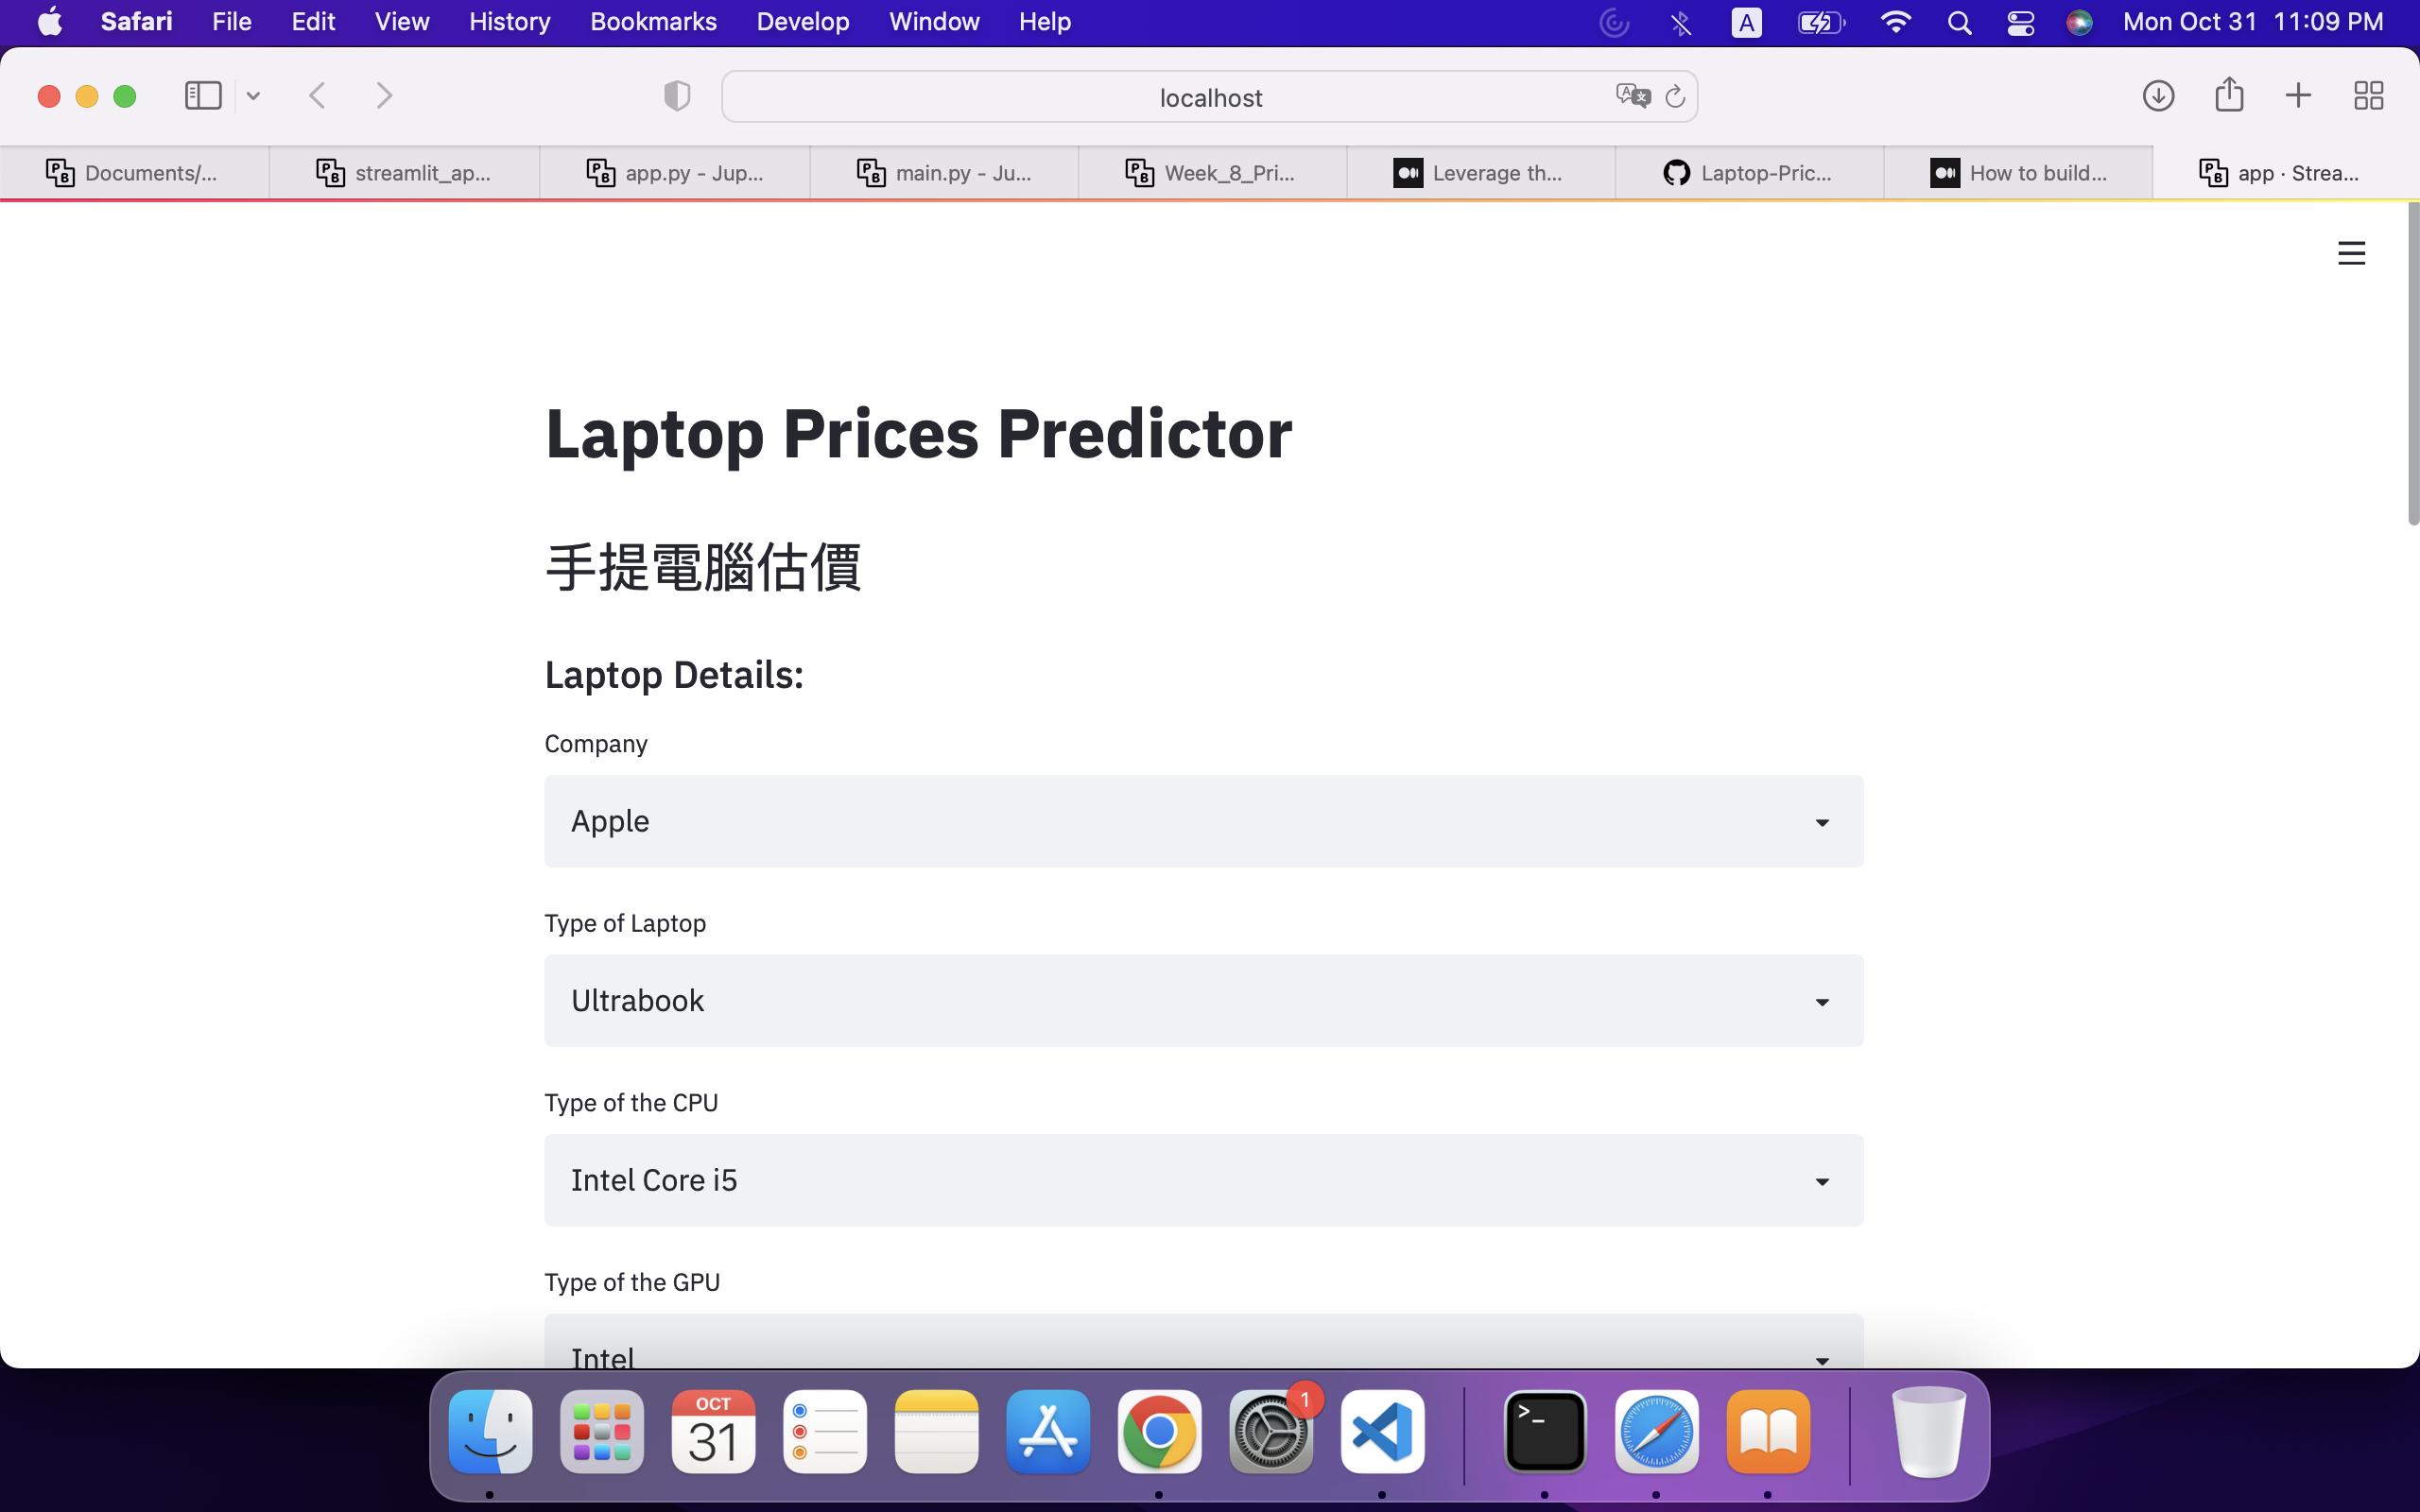

In [1]:
from IPython.display import Image
Image("laptop.png")

Project Structure
---
```
porject folder
              ➜ app.py
              ➜ deployment_20221101_1.pkl
              ➜ Laptop_price_EDA.csv
```
### app.py
```python

import streamlit as st
import joblib
import numpy as np
import pandas as pd
import sklearn
from pycaret.regression import load_model, predict_model

df = pd.read_csv('Laptop_price_EDA.csv')
st.title('Laptop Prices Predictor ')

# load model in pkl
model = load_model('deployment_20221101_1')

st.markdown( "## 手提電腦估價")
st.subheader('Laptop Details:')

# features considered in model
features_=['Company_name_encoded', 'TypeName_name_encoded',
           'Cpu_brand_name_encoded', 'CPU_vel', 'GPU_name_encoded', 'Ram',
           'first_type_name_encoded', 'first_size', 'second_type_name_encoded',
           'second_size', 'Touchscreen', 'Ips', 'Inches', 'ppi', 'os_name_encoded',
           'Price']

def label_dict(df_,feature,label_='_name_encoded'):
    feature_lab=feature+label_
    return {k: v for k, v in zip(df_[feature].unique(), df_[feature_lab].unique() )}

def select_type(opt,feature_opt):
    dic_=df_lab.loc[df_lab.index==feature_opt,'label'][0]
    return dic_[opt]

cat_f=['Company', 'TypeName','Cpu_brand', 'GPU', 'first_type', 'second_type','os']

label_array=[]
for cat in cat_f:
    cat_=label_dict(df,cat) 
    label_array.append(cat_)

df_lab=pd.DataFrame(index=cat_f)
df_lab['label']=label_array    

Company = st.selectbox("Company", options=df["Company"].unique())
Company_of_laptop = select_type(Company,'Company')

TypeName=st.selectbox("Type of Laptop", options=df["TypeName"].unique())
TypeName_of_laptop = select_type(TypeName,'TypeName')

Cpu_brand = st.selectbox("Type of the CPU", options=df["Cpu_brand"].unique())
Cpu_brand_of_laptop = select_type(Cpu_brand,'Cpu_brand')

GPU = st.selectbox("Type of the  GPU", options=df["GPU"].unique())
GPU_of_laptop = select_type(GPU,'GPU')

first_type = st.selectbox("First Storage", options=df["first_type"].unique())
first_type_of_laptop = select_type(first_type,'first_type')

second_type = st.selectbox("Second Storage", options=df["second_type"].unique())
second_type_of_laptop = select_type(second_type,'second_type')

os = st.selectbox("Operation System", options=df["os"].unique())
os_of_laptop = select_type(os,'os')

ram_in_gb = st.number_input('RAM in GB', step=4, min_value=4)
size_in_inches = st.number_input('Size of the laptop in Inches', step=0.1, min_value=10.0)
CPU_vel = st.number_input('Velocity of CPU', step=0.4, min_value=1.0)
touchscreen  = st.radio("Touchscreen (0-No,1-Yes)", options=[0, 1])
Ips  = st.radio("IPS Screen (0-No,1-Yes)", options=[0, 1])

ppi = st.number_input('Revolustion of ppi', step=10, min_value=90)
first_size = st.number_input('Size of First Storage', step=32, min_value=32)
second_size = st.number_input('Size of Second Storage', step=32, min_value=0)

features=[Company_of_laptop, TypeName_of_laptop, Cpu_brand_of_laptop, CPU_vel, GPU_of_laptop, ram_in_gb, \
          first_type_of_laptop, first_size, second_type_of_laptop, second_size, \
          touchscreen, Ips, size_in_inches, ppi, os_of_laptop]
# convert list to one of element of list
# [...] ➜ [[...]]

final_features = np.array(features).reshape(1, -1)

if st.button('Predict'):
    prediction = model.predict(final_features)
    st.balloons()
    st.success(f'Predicted Price of the Laptop is about NT$ {int(prediction[0])}')
```

Note
---
This is made by simple rules which might be not suitable: for instance, only `Mac OS` could be installed on Mac lap, and only armed-based CPU is the unique choice for it.
1. Bind the option Company together with OS
2. Storage Size: Recently, the cost of SSD has been decreasing very fast and the unit of such device is mostly calculated by `n × 128` G; this option would be adjusted if any recent data are added. 
4. streamlit also supports the `slider option`: `st.slider`; option in wild range could be changed by this choice.

Docker
---
In a grouped developed work, it is a long way to finalize the work, including coding, correcting, and testing stages; it is necessary to build a same working environment for every developer. This problem could be solved by introducing Docker solution which could build an image to run on certain project and run possibly on mostly operation system. In this following, we will demonstrate how to make a docker image for the streamlit app.  

1. requirements.txt

```
streamlit==1.14.0
numpy==1.22.4
pandas==1.4.4
pycaret==3.0.0rc4
catboost==1.1

```

2. Dockerfile

```shell
# frontend/Dockerfile

FROM python:3.8

COPY requirements.txt 

WORKDIR /app

RUN pip install -r requirements.txt

COPY . /app

EXPOSE 8501

ENTRYPOINT ["streamlit","run"]
CMD ["app.py"]
```
  - install based on Python-3.8
  - install required packages
  - copy all files into `app` folder
  - use port `8501
  - execute `streamlit` by app.py  

3. activate docker server, create docker, and test:

```shell
> docker build -t mystapp:latest .
> docker run -p 8501:8501 mystapp:latest
```
4. Share and run the local deploy by the last command.

Note
---
To prevent to conflict with `pycaret`, use numpy-1.22.4 and pandas-1.4.4; also install catboost for model predition since built by catboost.

In [1]:
import streamlit
streamlit.__version__

'0.81.1'

In [2]:
import numpy
numpy.__version__


'1.23.4'

In [3]:
import pandas
pandas.__version__

'1.5.1'

## Fastapi + streamlit, and Docker


```
Steamlit + FastAPI App

Front-end UI. <----> Deployment  <----> Model

⬆︎- Steamlit -⬆︎  ⥨  ⬆︎- fastapi-⬆︎


```


Deployment on Heroku
---

Heroku is a web-based cloud platform. We can deploy a python app on this heroku for public service.

1. register a free Heroku accound.
2. install `heroku-cli` for manipulation the app sources among local box, github repository and heroku.

Steps
---
1. Create an initialor file of Heroku, `Procfile`:
```shell
web: sh setup.sh && streamlit run app.py
```
2. Prepare cloud files for deployment:
   - `requiremets.txt`
3. create a setup file, `setup.sh` as follows:

```shell
mkdir -p ~/.streamlit/

echo "\
[server]\n\
port = $PORT\n\
enableCORS = false\n\
headless = true\n\
\n\
" > ~/.streamlit/config.toml

```
in which creates a new file, `config.toml`, within `.streamlit` folder . 

4.  Upload Code to Github: prepare the code source as follows:
```
porject folder ($app-folder)
              ➜ app.py
              ➜ deployment_20221101_1.pkl
              ➜ Laptop_price_EDA.csv
              ➜ Procfile
              ➜ setup.sh
```
   - create a new github repository, named `streamlit-deploy`:
   - upload the code to new github repository as follows:
```shell
> cd $app-folder
> git init
> git add -A
> git commit -m "first commit"
> git remote add origin https://github.com/cchuang2009/streamlit-deploy.git
> git push -u origin master
```

5. Login [Heroku](https://dashboard.heroku.com/terms-of-service) 
   - [Create new app] :  `price-model`  ⬅︎  <i style="color:red">app-name</i> below,
   - [Deployment method] ➜ <font style="color:white;background-color:black"> github </font>, and connect to the repository.
   - [Manual deploy] ➜ [Deploy Branch]
If build successfully, app will be hosted at  https://<i style="color:red"> app-name </i>.herokuapp.com  for service, here `https://price-model.herokuapp.com` generated.

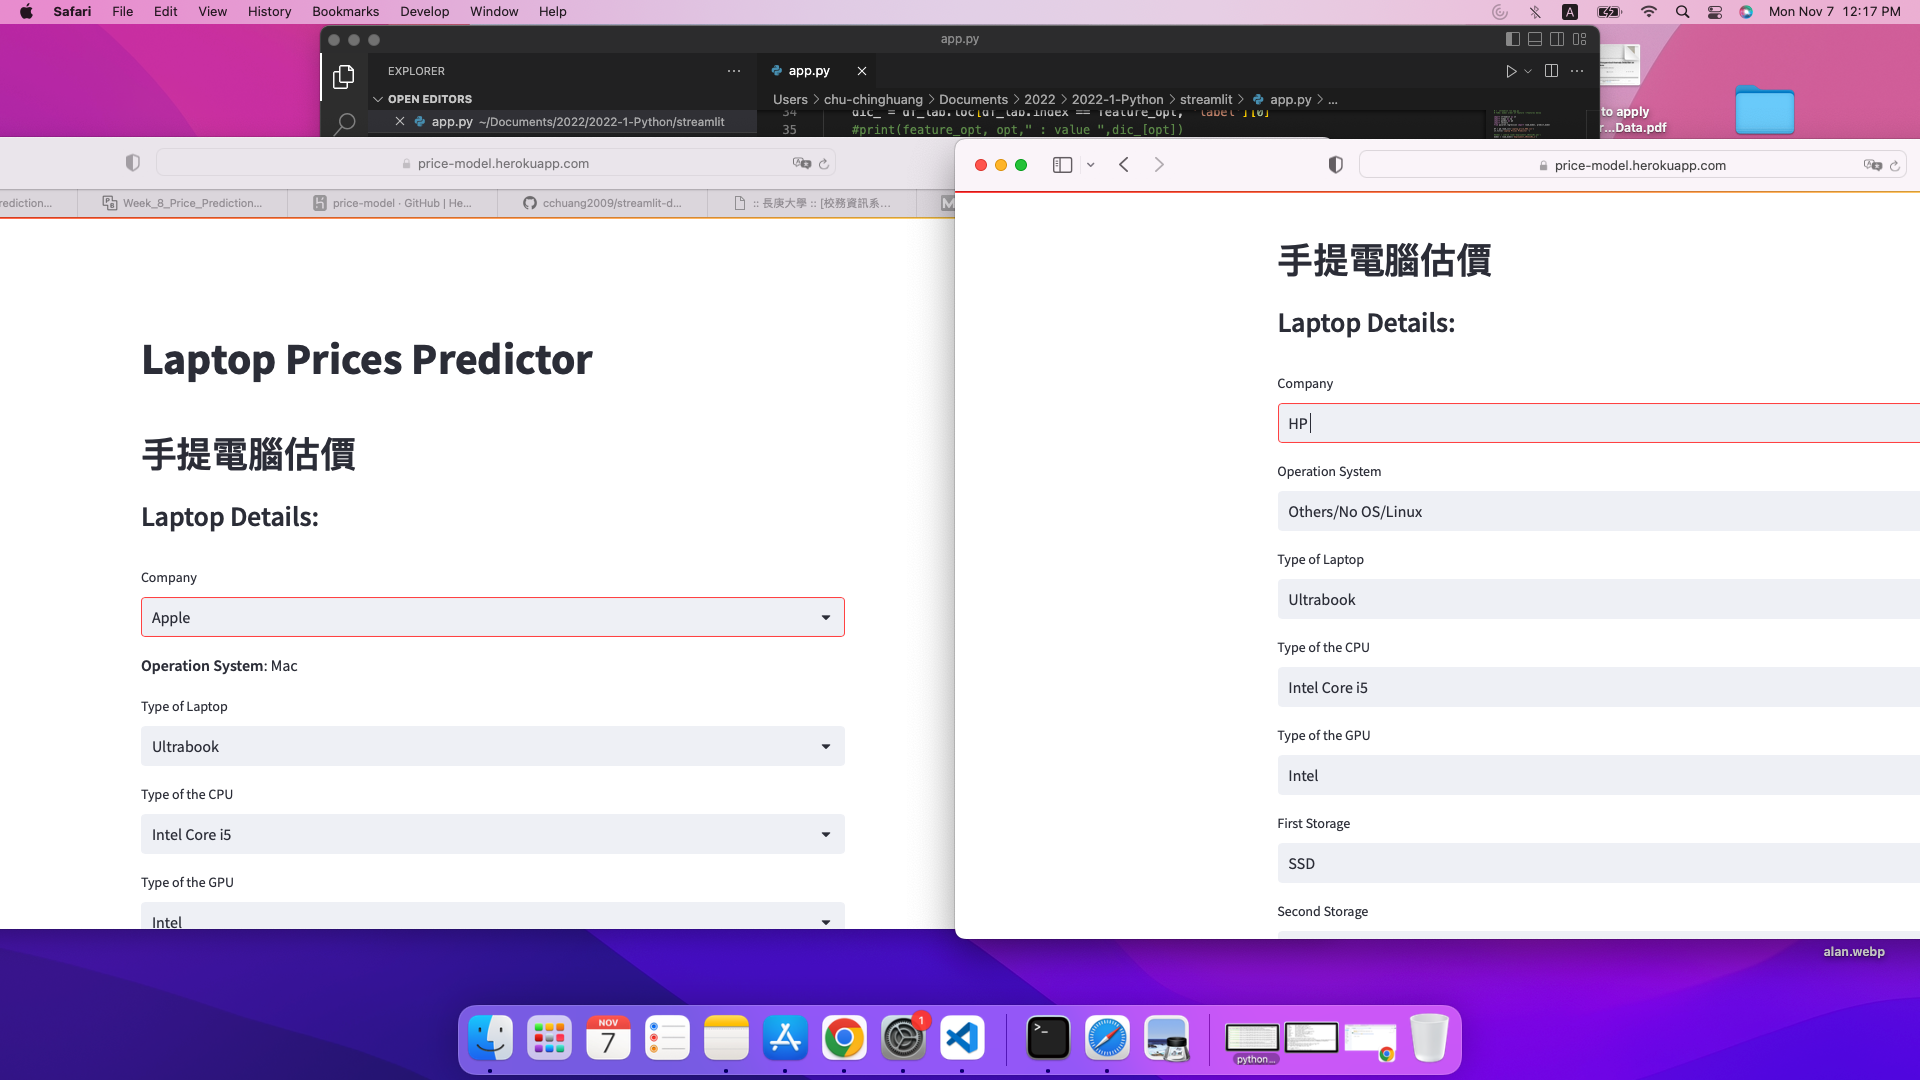

In [1]:
from IPython.display import Image
Image("heroku.png",width=800)

Note
---
Also can deploy from  [share.streamlit.io]( share.streamlit.io) simply without no more procedure:
1. create new app
2. connect github repo and the main app.py; and wait
3. [https://cchuang2009-streamlit-deploy-app-ywx9ql.streamlit.app/](https://cchuang2009-streamlit-deploy-app-ywx9ql.streamlit.app/)

Exercise
---
Complete your app on  share.streamlit.io.
